## Part 1

In [1]:
#Importing necessary packages

import pandas as pd
import seaborn as sns
import os
from math import log
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px
from sklearn.metrics import confusion_matrix
from statsmodels.formula.api import ols
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score
from termcolor import colored as cl # text customization
import seaborn as sb # visualization

from sklearn.model_selection import train_test_split # data split



from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve


plt.rcParams['figure.figsize'] = (20, 10) # plot size

sns.set(style='ticks')
sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size
import json
import calendar
 


In [2]:
#Importing data

take_home1 = json.load(open('logins.json', 'r'))

In [3]:
take_home1

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [4]:
#Conerting json data to DataFrame

take_home1 = pd.DataFrame(take_home1)

In [5]:
take_home1

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [6]:
take_home1.shape

(93142, 1)

In [7]:
take_home1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [8]:
take_home1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [9]:
take_home1.describe()

,login_time
count,93142
unique,92265
top,1970-03-29 03:24:57
freq,3


In [10]:
#Setting index

take_home1 = take_home1.set_index(['login_time'])
  
# converting index to datetime index

take_home1.index = pd.to_datetime(take_home1.index)
  


In [11]:
take_home1['count'] = 1

In [12]:
#Setting the 15 minutes time stamp

resampled = take_home1.resample('15T',  loffset='15Min').sum()
  

<ipython-input-12-27dee9aca9a9>:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  resampled = take_home1.resample('15T',  loffset='15Min').sum()


In [13]:
resampled

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1
...,...
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2


In [14]:
resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [15]:
resampled.isnull().sum().sum()

0

In [16]:
take_home1.isnull().sum().sum()

0

In [17]:
resampled.shape

(9788, 1)

<AxesSubplot:xlabel='login_time'>

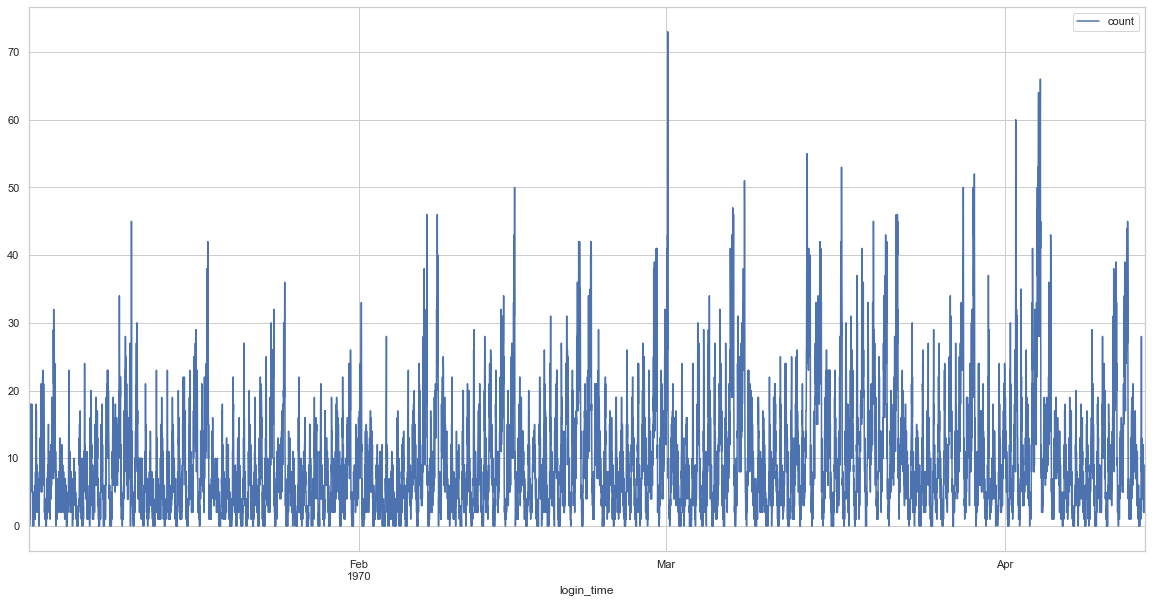

In [18]:
resampled.plot()

In [19]:
#Extracting features from data

resampled['time'] = pd.to_datetime(resampled.index)

In [20]:
print(type(resampled.time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [21]:

resampled['month'] = resampled.time.dt.month
resampled['day'] = resampled.time.dt.day
resampled['hour'] = resampled.time.dt.hour
resampled['week'] = resampled.time.dt.week
resampled['weekday'] = resampled.time.dt.weekday
resampled.head()

<ipython-input-21-9629c5b97c6f>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  resampled['week'] = resampled.time.dt.week


,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

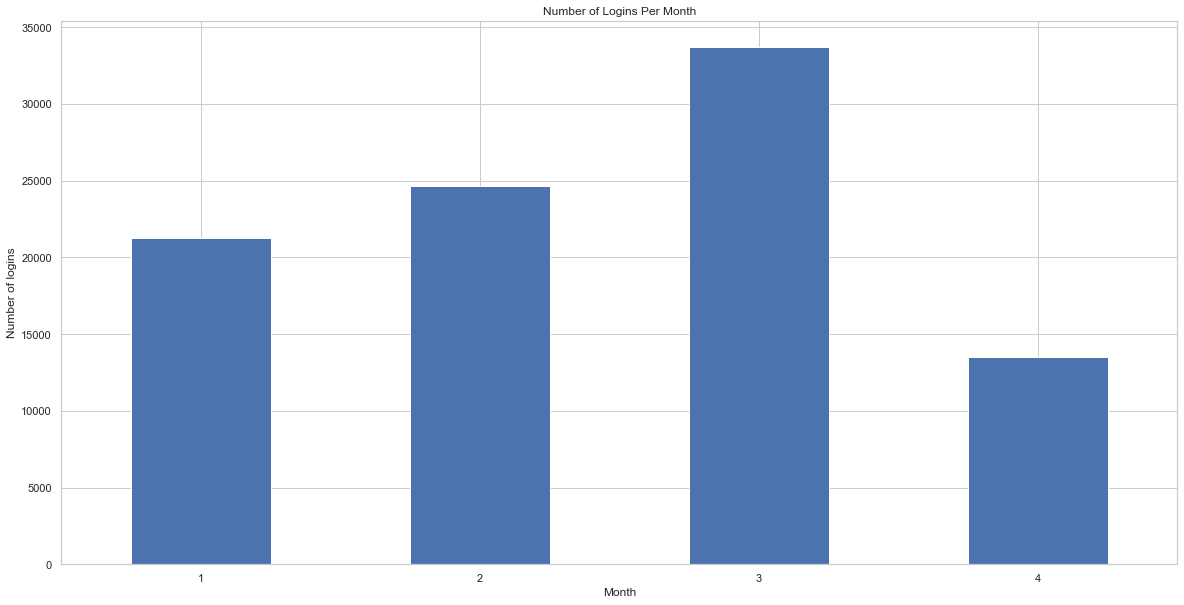

In [22]:
#Checking the number of logins for every month

resampled.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Number of Logins Per Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Logins keep increasing with every passing month. It reached its peak in the month of March.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

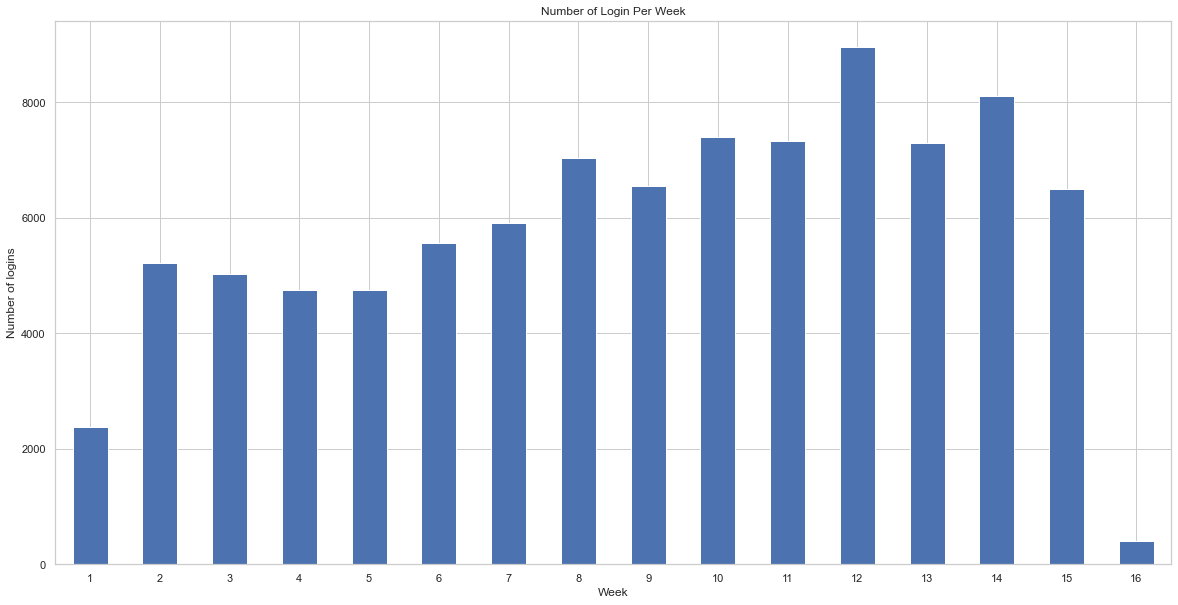

In [23]:
#Checking for number of logins per week

resampled.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Number of Login Per Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

There is a little bit of irregular movement in the bar chart. Logins reached its peach in the twelveth week, which is the last week of March. This confirms the previous finding when the data was grouped by months, with March having the highest number of logins.

[Grouping By Weekday]
weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

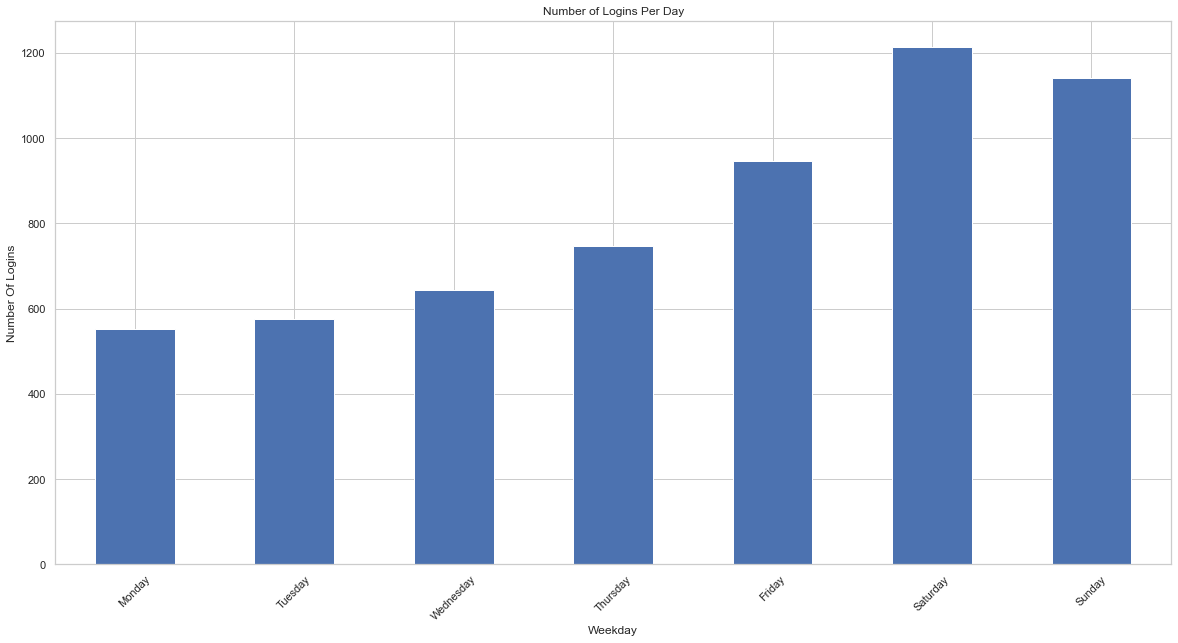

In [24]:
# Grouping by weekday and checking for the number of logins for every day of the week

import calendar
week_number = 16   # total number of weeks 
print ('[Grouping By Weekday]')
print (resampled.groupby('weekday')['count'].aggregate(np.sum)/week_number)
ax = (resampled.groupby('weekday')['count'].sum()/week_number).plot(kind='bar')
plt.title("Number of Logins Per Day")
plt.xlabel("Weekday")
plt.ylabel("Number Of Logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

The above shows that there is an increase in logins as the weeks progress, making weekends the days with most logins. This could be because people are much less busy on weekends than on weekdays.

In [25]:
# Checking for aggregate login counts per day

resampled_per_day = take_home1.resample('D').sum()

In [26]:
resampled_per_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [27]:
resampled_per_day['date'] = pd.to_datetime(resampled_per_day.index)
resampled_per_day['weekday'] = resampled_per_day.date.dt.weekday

In [28]:
resampled_per_day.head()

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

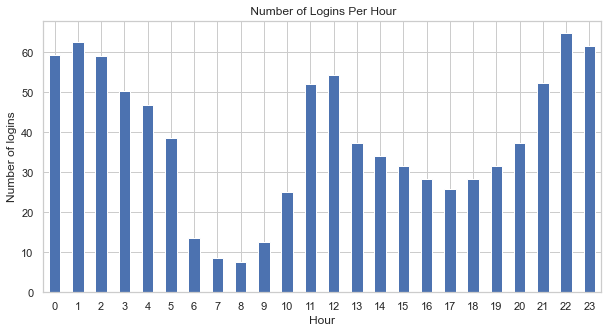

In [29]:
# Grouping by hour

number_of_days = 30 + 28 + 30 + 13   # total days
(resampled.groupby('hour')['count'].sum()/number_of_days).plot(kind='bar', figsize=(10,5))
plt.title(" Number of Logins Per Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

From the above diagram, it can be deduced that late at nights until early hours of the days are when most logins occur. Early mornings at dawn have the least number of logins.

In [30]:
# Checking for aggregate login counts per hour

resampled_per_hour = take_home1.resample('H').sum()

In [31]:
resampled_per_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [32]:
resampled_per_hour['time'] = pd.to_datetime(resampled_per_hour.index)
resampled_per_hour['hour'] = resampled_per_hour.time.dt.hour

In [33]:
resampled_per_hour.head()

,count,time,hour
login_time,,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00,20
1970-01-01 21:00:00,9,1970-01-01 21:00:00,21
1970-01-01 22:00:00,21,1970-01-01 22:00:00,22
1970-01-01 23:00:00,58,1970-01-01 23:00:00,23
1970-01-02 00:00:00,53,1970-01-02 00:00:00,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

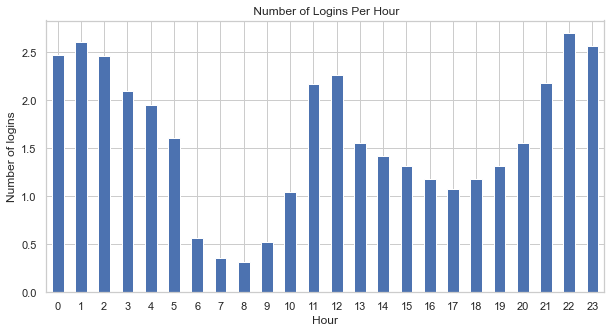

In [34]:
#Visualizing the distribution of logins per hour

number_of_hours = 720 + 672 + 720 + 312   # total hours
(resampled.groupby('hour')['count'].sum()/number_of_hours).plot(kind='bar', figsize=(10,5))
plt.title(" Number of Logins Per Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)



## Conclusion

Logins was increasing with every passing day and month. Weekends had the most logins, probably because people are much less busy on weekends than they are on weekdays. Late at nights until early hours of the days are when most logins occur. Early mornings at dawn have the least number of logins. Logins reached its highest in the month of March. There is a little bit of irregular movement in the bar chart when the data was grouped by weeks. Logins reached its peak in the twelveth week, which is the last week of March. This confirms the previous finding when the data was grouped by months, with March having the highest number of logins.




## Part 2

1. I will take a look at the Gross income data in each city's economy when driver partners are exclusive to each city and when they are available in both cities, as well as, before and after toll reinbursments have ben made. If the positive difference in both economies during each scenario is large enough, the project can then be considered a success. I will use this approach because profits for both cities are as important as the services these driver partners provide to people and comparing economies for both scenarios is a great way to determing if needed results were yielded.

2. a. As in (1) above, how well the economy is doing before and after the toll-free passage is implemented is what I         will use to determine if the approach was effective or not.

   b. T-test and significance testing will be done to determine if this approach is beneficial to one or both cities.
   
   c. I will look at patterns which may be causing success or failure of the approach and determine what ways they may       be improved. If there is no difference in the economies after implementation of the approach, I will recommend         that the approach be left implemented anyway. If one or both cities lose significant revenues after                   implementation, I will recommend considering other ways of balancing things out like lowering the toll fees and       making the driver partners increase fare so it can all somehow balance out.

## Part 3

### Data Wrangling

In [35]:
ultimate = open('ultimate_data_challenge.json', 'r')


In [36]:
ultimate = pd.DataFrame(ultimate)

In [37]:
#importing the data

ultimate = open('ultimate_data_challenge.json', 'r')
ultimate_df = pd.DataFrame(json.load(ultimate))
ultimate.close()



In [38]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [39]:
ultimate_df.shape

(50000, 12)

In [40]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [41]:
ultimate_df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [42]:
duplicates = ultimate_df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


In [43]:
ultimate_df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [44]:
# Converting dates to datetime format

ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])

In [45]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

### Exploratory Data Analysis

In [46]:
ultimate_df.isnull().sum().sum()

8719

In [47]:
#Replacing missing values

ultimate_df['avg_rating_by_driver'].fillna(ultimate_df['avg_rating_by_driver'].mean(), inplace=True)
ultimate_df['avg_rating_of_driver'].fillna(ultimate_df['avg_rating_of_driver'].mean(), inplace=True)
ultimate_df.dropna(axis=0, inplace=True)
ultimate_df = ultimate_df.reset_index(drop=True)

In [48]:
ultimate_df = ultimate_df.reset_index(drop=True)

In [49]:
# Converting dates to datetime
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])

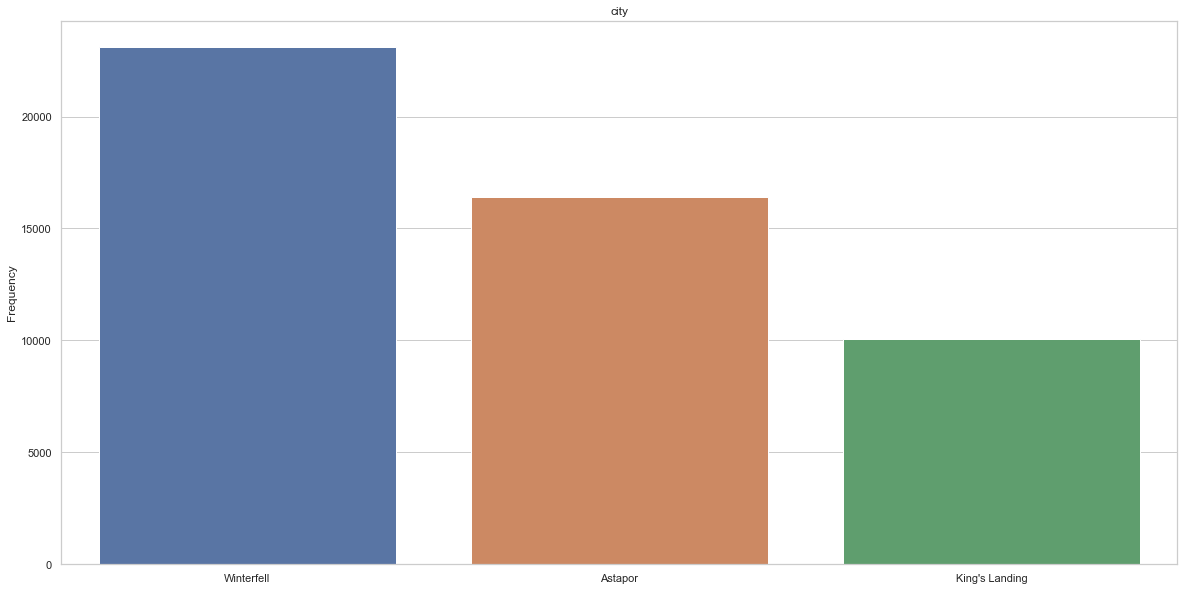

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


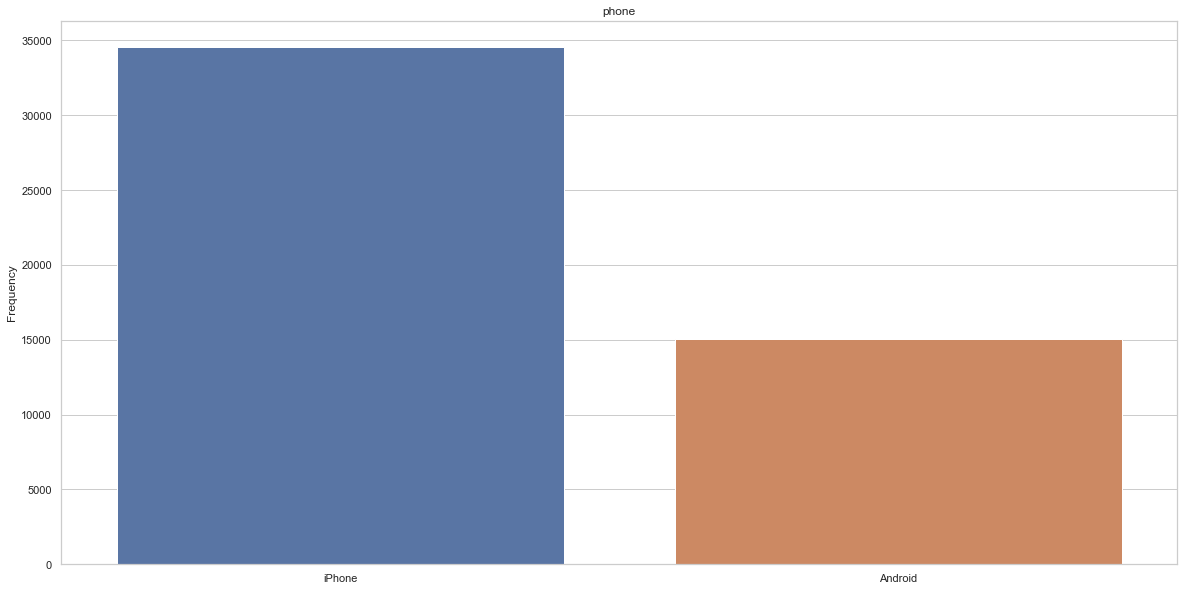

iPhone     34582
Android    15022
Name: phone, dtype: int64


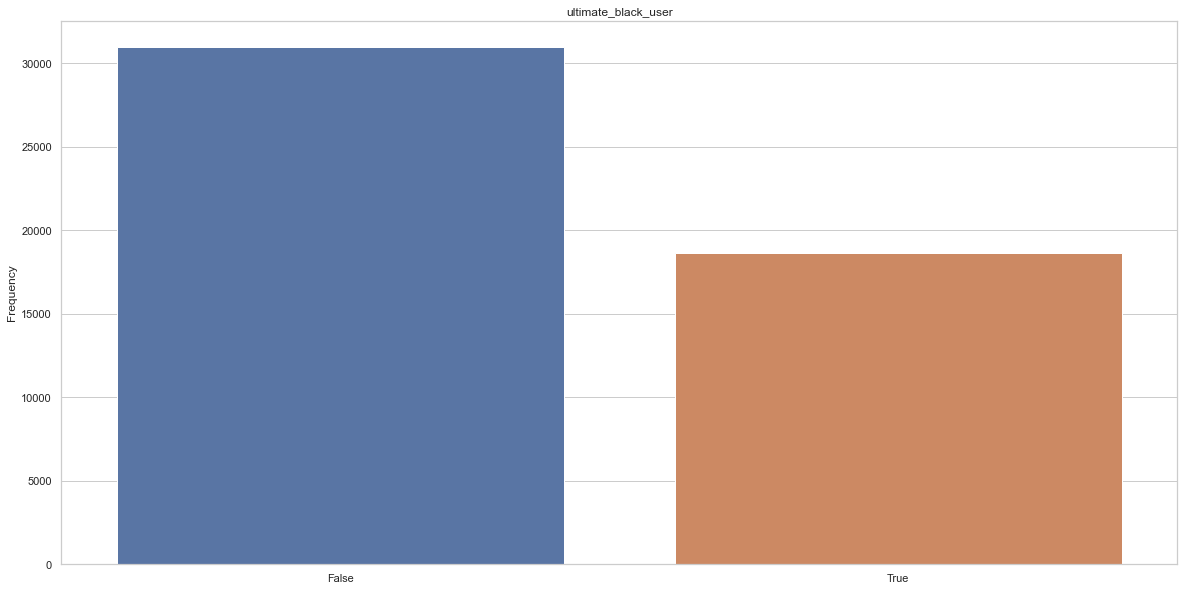

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [50]:
# Identifying and visualizing all categorical, non-date data
cat_data = ['city', 'phone', 'ultimate_black_user']

for feature in cat_data:
    sns.barplot(x = list(ultimate_df[feature].value_counts().index), y = ultimate_df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(ultimate_df[feature].value_counts())

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


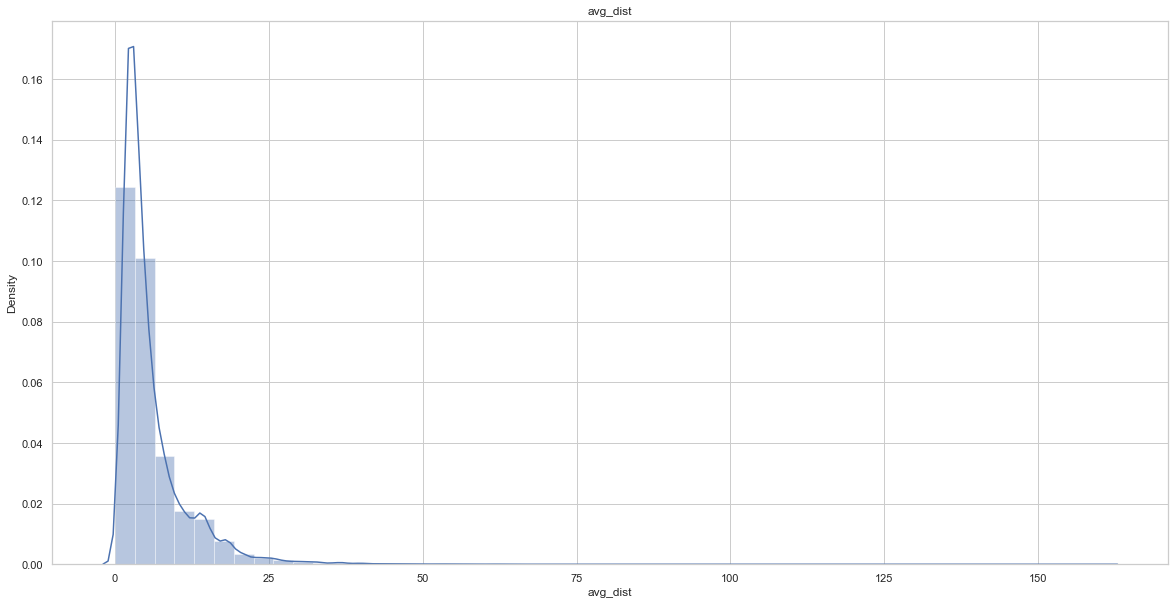

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


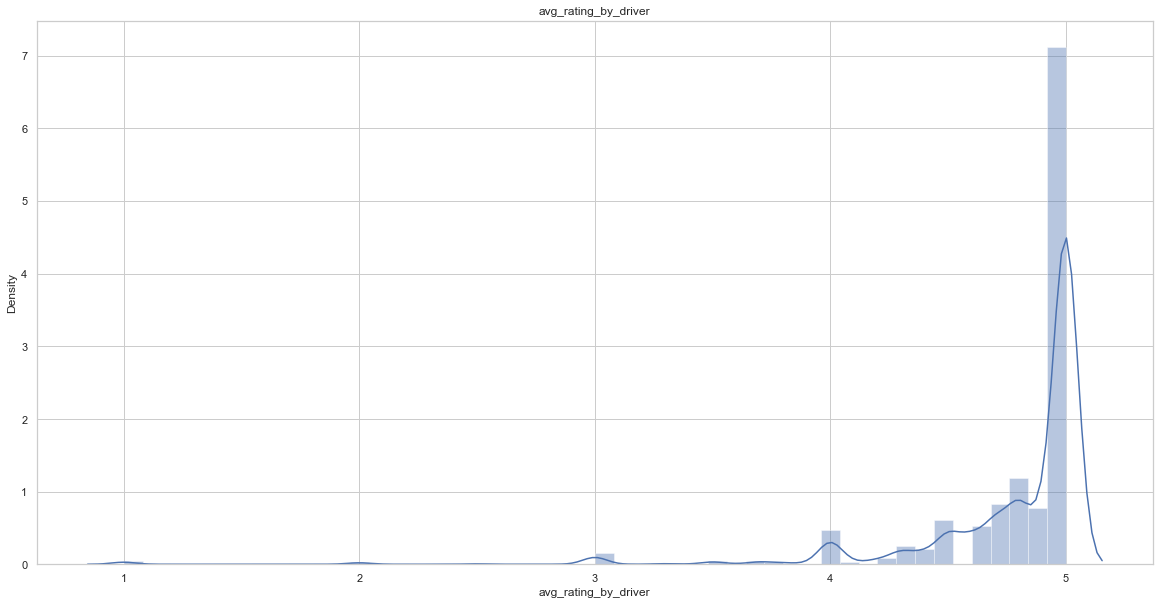

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


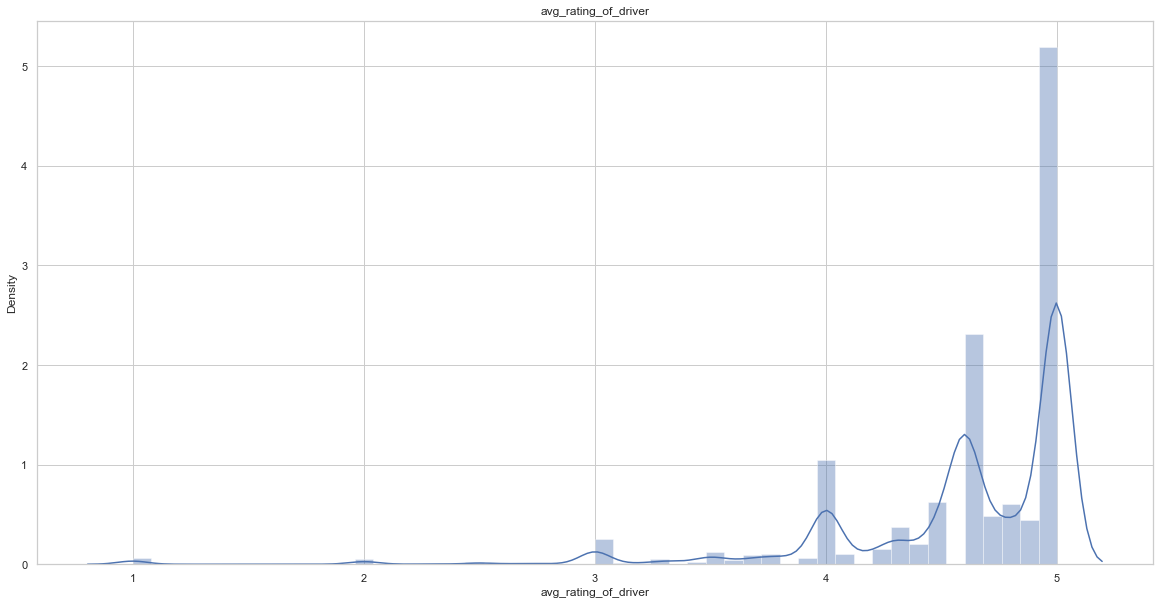

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


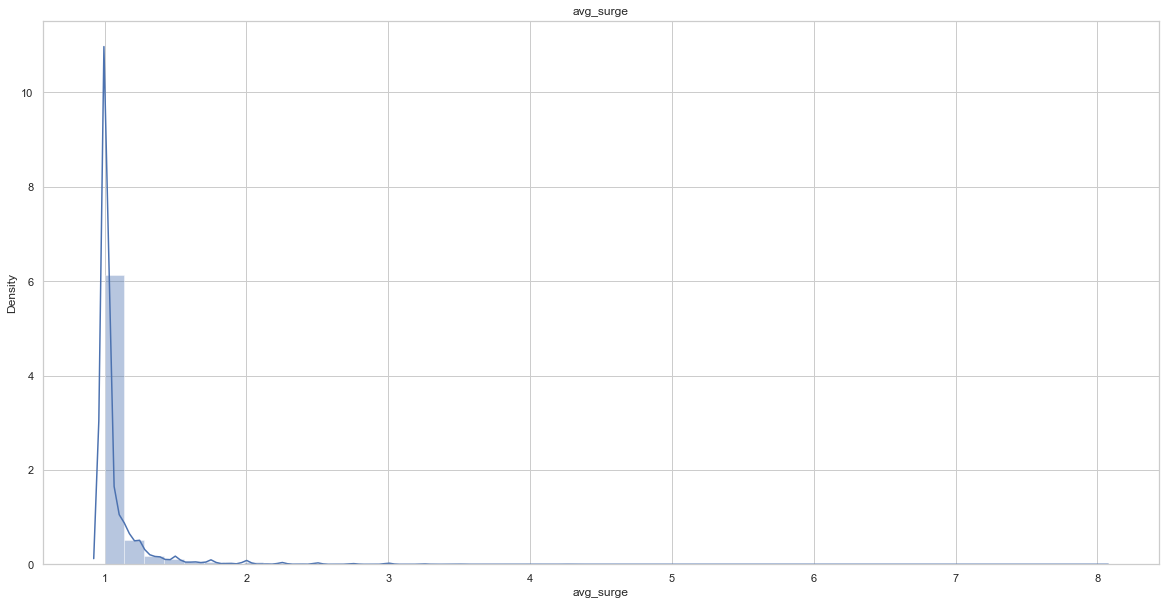

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


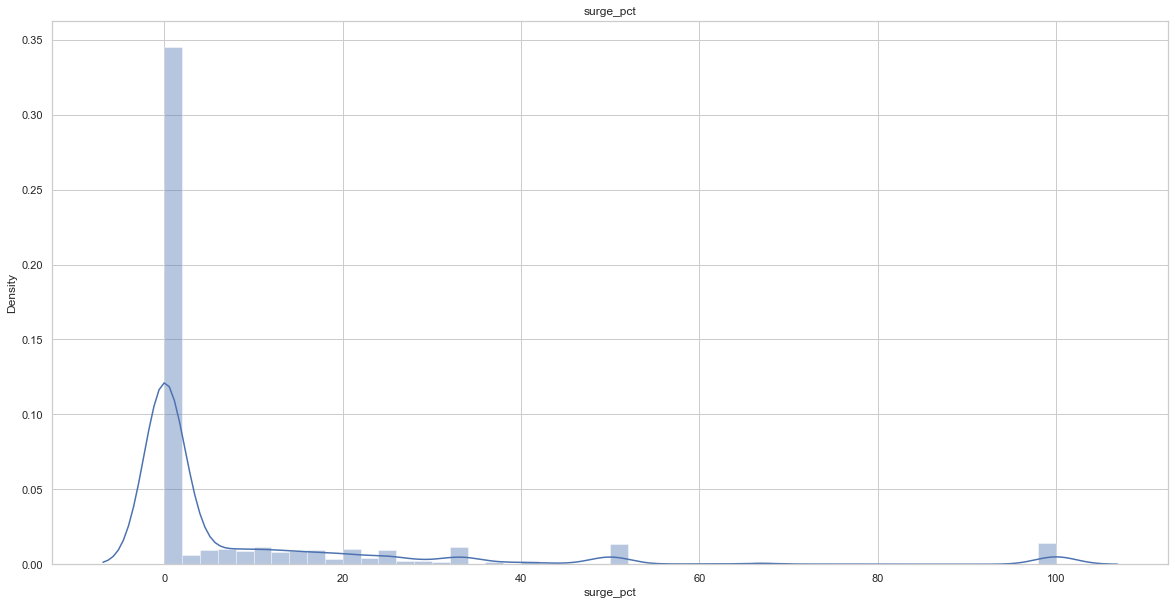

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


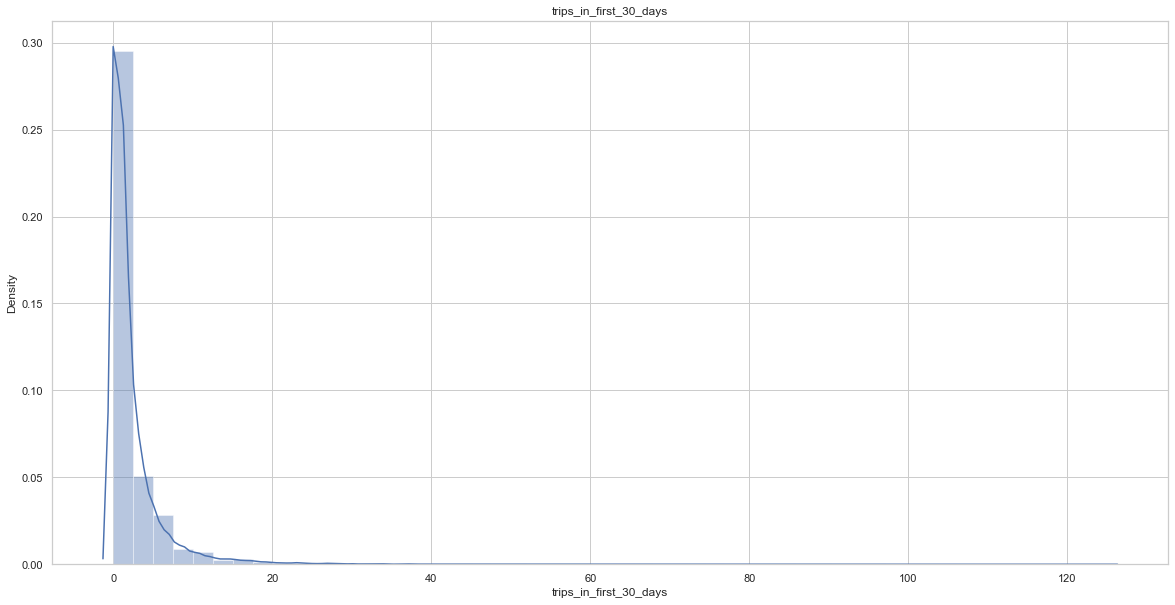

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


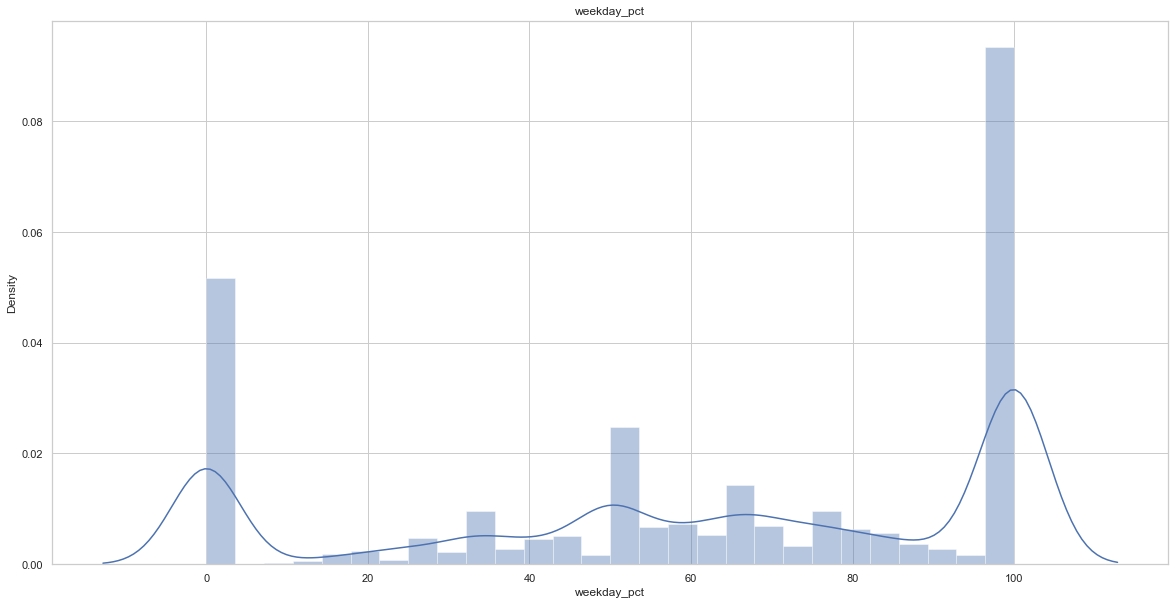

In [51]:
# Identifying and visualizing numerical features
num_data = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

for feature in num_data:
    sns.distplot(ultimate_df[feature])
    plt.title(feature)
    plt.show();

Trying to determine which customers were retained.

In [52]:
ultimate_df.sort_values(by='last_trip_date').head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
38503,Astapor,1,2014-01-01,4.601559,1.0,2014-01-01,iPhone,0.0,False,100.0,1.69,5.0
25839,Winterfell,1,2014-01-01,4.601559,1.0,2014-01-01,Android,0.0,True,100.0,16.17,5.0
32993,Winterfell,1,2014-01-01,4.000000,1.0,2014-01-01,iPhone,0.0,False,100.0,6.83,3.0
31413,Astapor,1,2014-01-01,4.601559,2.0,2014-01-01,iPhone,100.0,True,100.0,5.06,5.0
3753,Astapor,1,2014-01-01,4.601559,1.0,2014-01-01,Android,0.0,True,100.0,2.98,5.0


In [53]:
ultimate_df.sort_values(by='last_trip_date').tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
45166,King's Landing,2,2014-01-25,4.4,1.14,2014-07-01,Android,17.9,False,83.9,2.32,4.8
12053,King's Landing,16,2014-01-18,4.9,1.02,2014-07-01,Android,3.9,False,74.0,2.64,4.8
18667,Astapor,3,2014-01-10,4.7,1.02,2014-07-01,iPhone,3.2,False,67.7,6.22,4.8
11999,Winterfell,1,2014-01-24,4.7,1.04,2014-07-01,iPhone,15.4,True,38.5,6.80,4.9
31351,Winterfell,12,2014-01-19,4.9,1.07,2014-07-01,iPhone,6.0,True,70.0,5.63,4.7


The "tail" table above shows that the latest last trip date from the dataset is 2014-07-01. So, a customer is considered retained if they took a trip within the previous thirty days dating back to 2014-07-01.

In [54]:
 pct_retained = len(ultimate_df[ultimate_df['last_trip_date'] > '2014-06-01'])/len(ultimate_df)
print('{:.2f}% of customers were retained.'.format(pct_retained*100))

36.65% of customers were retained.


Now we have to create a column for the retained customers.

In [55]:
ultimate_df['retained'] = (ultimate_df['last_trip_date'] > '2014-06-01')*1
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [56]:
#ultimate_df_clean = ultimate_df_clean.reset_index(drop=True)
#ultimate_df_clean.info()

In [57]:
# Converting categorical features into integers by creating dummy variables for them for easy model deployment

ultimate_df_clean = pd.get_dummies(ultimate_df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)
ultimate_df_clean.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,1,0,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,1,0,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,1,0,0


### Pre-processing and Training

In [58]:
#Dropping datetime data

ultimate_df_clean.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [59]:
X = ultimate_df_clean.drop('retained', axis=1)
y = ultimate_df_clean['retained']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
rf_clf = RandomForestClassifier()
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.76741842 0.76111881 0.76804838 0.76638105 0.76285282]
Average 5-Fold CV Score: 0.7651638965319634


In [62]:
# Defining a function to get the metrics of the model

def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [63]:
# Creating hyperparameter grid

n_options = [10,20,50,100,200]
feature_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
param_grid = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

In [64]:
# Validating the GridSearchCV object

rf_clf_cv = GridSearchCV(rf_clf, param_grid, cv=5)


In [65]:
# building  model 

rf_clf_cv.fit(X_train, y_train)


/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [5, 8, 10, 'auto', None],
                         'n_estimators': [10, 20, 50, 100, 200],
                         'oob_score': [True, False]})

In [66]:
# Deploying model for prediction

y_predict = rf_clf_cv.predict(X_test)

In [67]:
# Getting the optimal parameters and best score

print("Tuned Parameter: {}".format(rf_clf_cv.best_params_))
print("Tuned Score: {}".format(rf_clf_cv.best_score_))
print()

Tuned Parameter: {'max_features': 10, 'n_estimators': 200, 'oob_score': False}
Tuned Score: 0.7677846578854852



In [68]:
# evaluating model performance 

print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Test set performance:
Accuracy:  0.7630279205725229
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      6290
           1       0.68      0.66      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921



In [69]:
rf_class = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
rf_class.fit(X_train, y_train)
y_pred = rf_class.predict(X_test)

In [70]:
# Generating classification report

print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      6290
           1       0.68      0.66      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921

Test set accuracy: 76.10%


In [71]:
# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,5171,1119
1,1252,2379


In [72]:
prob_y_pred = rf_class.predict_proba(X_test)[:,1]

In [73]:
# Generating ROC curve values: fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_test, prob_y_pred)

Text(0.5, 1.0, 'ROC Curve')

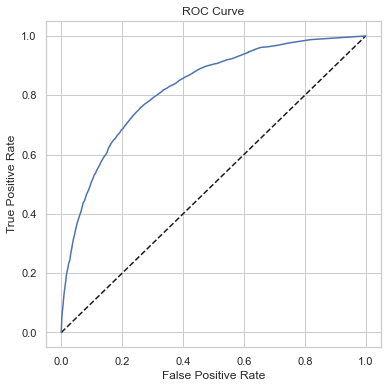

In [74]:
# Plotting ROC curve

plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [75]:
# Computing AUC score

print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_y_pred)))

AUC: 0.8231


In [77]:
fi = pd.DataFrame(list(zip(X.columns, rf_class.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
5,avg_dist,0.297493
6,avg_rating_by_driver,0.152158
4,weekday_pct,0.114610
3,surge_pct,0.084456
1,avg_rating_of_driver,0.080786


## Conclusion

I used RandomForestClassifier to classify active and inactive users. This got an AUC score of 82.31%. Linear Regression will be a good model too.

## Recomendations

Ultimate should give sign-up discounts , as well as, discounted rides for the first month. Also, driver ratings should be given close attention as this would make drivers treat customers with utmost courtesy.